In [2]:
import pandas as pd
import openpyxl
print(openpyxl.__version__)

df1 = pd.read_excel('附件1.xlsx', sheet_name='Sheet1', engine='openpyxl')

vege_name_dict = dict(zip(df1['单品编码'], df1['单品名称']))

print(vege_name_dict)

# 将字典转换为 DataFrame
vege_name_df = pd.DataFrame(list(vege_name_dict.items()), columns=['单品编码', '单品名称'])

# 将 DataFrame 保存为 xlsx 文件
vege_name_df.to_excel('vege_name_dict.xlsx', index=False, engine='openpyxl')

print("字典已成功保存为 vege_name_dict.xlsx")

3.1.5
{102900005115168: '牛首生菜', 102900005115199: '四川红香椿', 102900005115625: '本地小毛白菜', 102900005115748: '白菜苔', 102900005115762: '苋菜', 102900005115779: '云南生菜', 102900005115786: '竹叶菜', 102900005115793: '小白菜', 102900005115816: '南瓜尖', 102900005115823: '上海青', 102900005115854: '萝卜叶', 102900005115861: '牛首油菜', 102900005115878: '茼蒿', 102900005115885: '蔡甸藜蒿', 102900005115908: '菜心', 102900005115946: '木耳菜', 102900005115960: '大白菜', 102900005115977: '豌豆尖', 102900005115984: '云南油麦菜', 102900005116639: '马齿苋', 102900005116776: '本地菠菜', 102900005116790: '黄心菜(1)', 102900005116806: '黑油菜', 102900005118572: '本地上海青', 102900005118817: '菠菜', 102900005118831: '娃娃菜', 102900005119975: '红薯尖', 102900005122654: '枝江红菜苔', 102900005128748: '黄花菜', 102900011000175: '快菜', 102900011000571: '随州泡泡青', 102900011002414: '田七', 102900011006689: '东门口小白菜', 102900011006948: '外地茼蒿', 102900011006955: '冰草', 102900011007464: '紫苏', 102900011007471: '薄荷叶', 102900011007495: '蒲公英', 102900011008133: '丝瓜尖', 102900011008164: '奶白菜', 102900011008485:

In [ ]:
# 读取附件 2
df2 = pd.read_excel('附件2.xlsx', sheet_name='Sheet1', engine='openpyxl')

print(df2.head())  # 打印附件 2 的前几行数据以验证读取成功

# 添加“季度”列
def get_quarter(date):
    month = date.month
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    elif 10 <= month <= 12:
        return 'Q4'

df2['季度'] = df2['销售日期'].apply(get_quarter)

print(df2[['销售日期', '季度']].head())  # 打印验证新增的“季度”列

# 提取附件 1 中“单品名称”与“分类名称”的对应关系，zip 用于配对
category_dict = dict(zip(df1['单品编码'], df1['分类名称']))

# 根据“单品名称”添加“分类名称”列到附件 2
df2['分类名称'] = df2['单品编码'].map(category_dict)

print(df2[['单品编码', '分类名称']].head())  # 打印验证新增的“分类名称”列

# 输出
df2.to_excel('附件2_处理后_2.xlsx', index=False)

Exception ignored in: <function ZipFile.__del__ at 0x10437cd30>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/modeling/lib/python3.10/zipfile.py", line 1834, in __del__
    self.close()
  File "/opt/anaconda3/envs/modeling/lib/python3.10/zipfile.py", line 1851, in close
    self.fp.seek(self.start_dir)
TimeoutError: [Errno 60] Operation timed out


        销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否
        销售日期  季度
0 2020-07-01  Q3
1 2020-07-01  Q3
2 2020-07-01  Q3
3 2020-07-01  Q3
4 2020-07-01  Q3
              单品编码 分类名称
0  102900005117056  辣椒类
1  102900005115960  花叶类
2  102900005117056  辣椒类
3  102900005115823  花叶类
4  102900005115908  花叶类


在df2中出现的分类名称：
['辣椒类' '花叶类' '水生根茎类' '食用菌' '花菜类' '茄类']
映射后的结果：
     分类名称        Category_EN
0     辣椒类             Pepper
1     花叶类      Flower & Leaf
10  水生根茎类       Aquatic Root
12    食用菌       Edible Fungi
25    花菜类  Flower Vegetables
72     茄类           Eggplant
分组后的数据前5行：
        销售日期        Category_EN   销量(千克)
0 2020-07-01       Aquatic Root    4.850
1 2020-07-01       Edible Fungi   35.365
2 2020-07-01           Eggplant   35.374
3 2020-07-01      Flower & Leaf  205.402
4 2020-07-01  Flower Vegetables   46.640
分组中的唯一分类：
['Aquatic Root' 'Edible Fungi' 'Eggplant' 'Flower & Leaf'
 'Flower Vegetables' 'Pepper']


在df2中出现的分类名称：
['辣椒类' '花叶类' '水生根茎类' '食用菌' '花菜类' '茄类']
映射后的结果：
     分类名称        Category_EN
0     辣椒类             Pepper
1     花叶类      Flower & Leaf
10  水生根茎类       Aquatic Root
12    食用菌       Edible Fungi
25    花菜类  Flower Vegetables
72     茄类           Eggplant
分组后的数据前5行：
        销售日期        Category_EN   销量(千克)
0 2020-07-01       Aquatic Root    4.850
1 2020-07-01       Edible Fungi   35.365
2 2020-07-01           Eggplant   35.374
3 2020-07-01      Flower & Leaf  205.402
4 2020-07-01  Flower Vegetables   46.640
分组中的唯一分类：
['Aquatic Root' 'Edible Fungi' 'Eggplant' 'Flower & Leaf'
 'Flower Vegetables' 'Pepper']


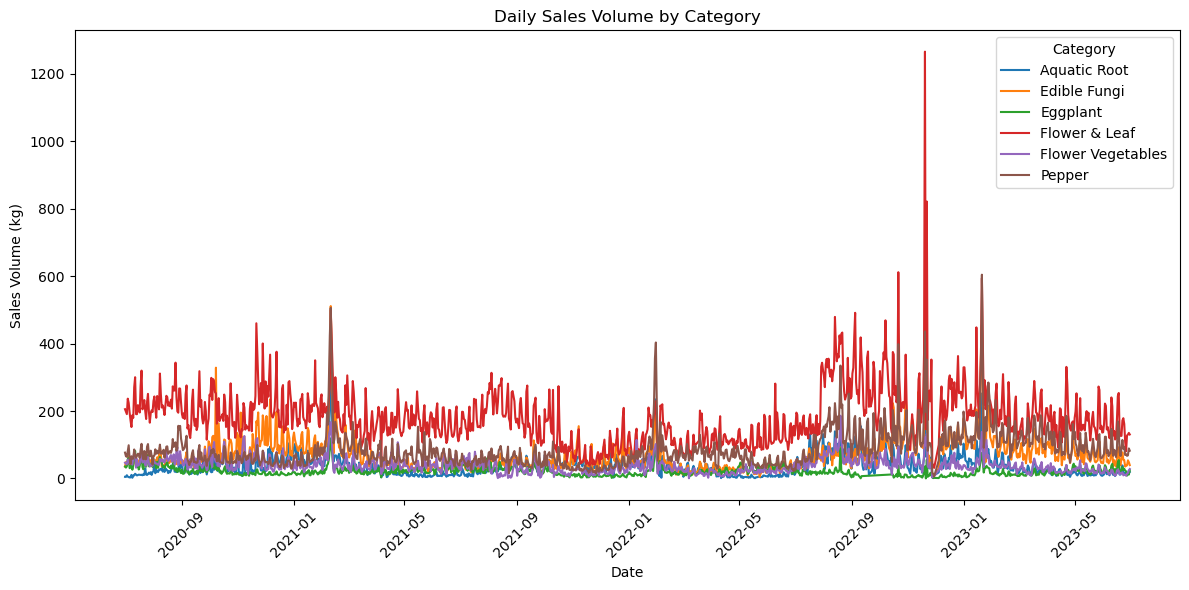

In [ ]:
import matplotlib.pyplot as plt

# 首先检查df2中有哪些不同的分类名称
print("在df2中出现的分类名称：")
print(df2['分类名称'].unique())

# 修正中文分类名称到英文的映射字典，使用实际的分类名称并添加"花菜类"
category_cn_to_en = {
    '辣椒类': 'Pepper',
    '花叶类': 'Flower & Leaf',
    '水生根茎类': 'Aquatic Root',
    '食用菌': 'Edible Fungi',
    '茄类': 'Eggplant',
    '花菜类': 'Flower Vegetables'  # 添加"花菜类"的映射
}

# 在df2中添加英文分类名称列
df2['Category_EN'] = df2['分类名称'].map(category_cn_to_en)

# 检查映射后的结果
print("映射后的结果：")
print(df2[['分类名称', 'Category_EN']].drop_duplicates())

# 检查是否有未成功映射的分类（会显示为NaN）
unmapped = df2[df2['Category_EN'].isna()]
if len(unmapped) > 0:
    print("未能成功映射的记录：")
    print(unmapped['分类名称'].unique())

# 按日期和英文分类名称分组，计算每天每个分类的总销售量
grouped = df2.groupby(['销售日期', 'Category_EN'])['销量(千克)'].sum().reset_index()

# 打印分组后数据的前几行和唯一的Category_EN值，确认分组正确
print("分组后的数据前5行：")
print(grouped.head())
print("分组中的唯一分类：")
print(grouped['Category_EN'].unique())

# 绘制折线图
plt.figure(figsize=(12, 6))
for category in grouped['Category_EN'].unique():
    if pd.notna(category):  # 只绘制非NaN的分类
        category_data = grouped[grouped['Category_EN'] == category]
        plt.plot(category_data['销售日期'], category_data['销量(千克)'], label=category)

# 添加图例、标题和坐标轴标签
plt.legend(title='Category')
plt.title('Daily Sales Volume by Category')
plt.xlabel('Date')
plt.ylabel('Sales Volume (kg)')
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图形
plt.show()

各分类总销量统计：
         Category_EN      销量(千克)
0       Aquatic Root   40581.353
1       Edible Fungi   76086.725
2           Eggplant   22431.782
3      Flower & Leaf  198520.978
4  Flower Vegetables   41766.451
5             Pepper   91588.629


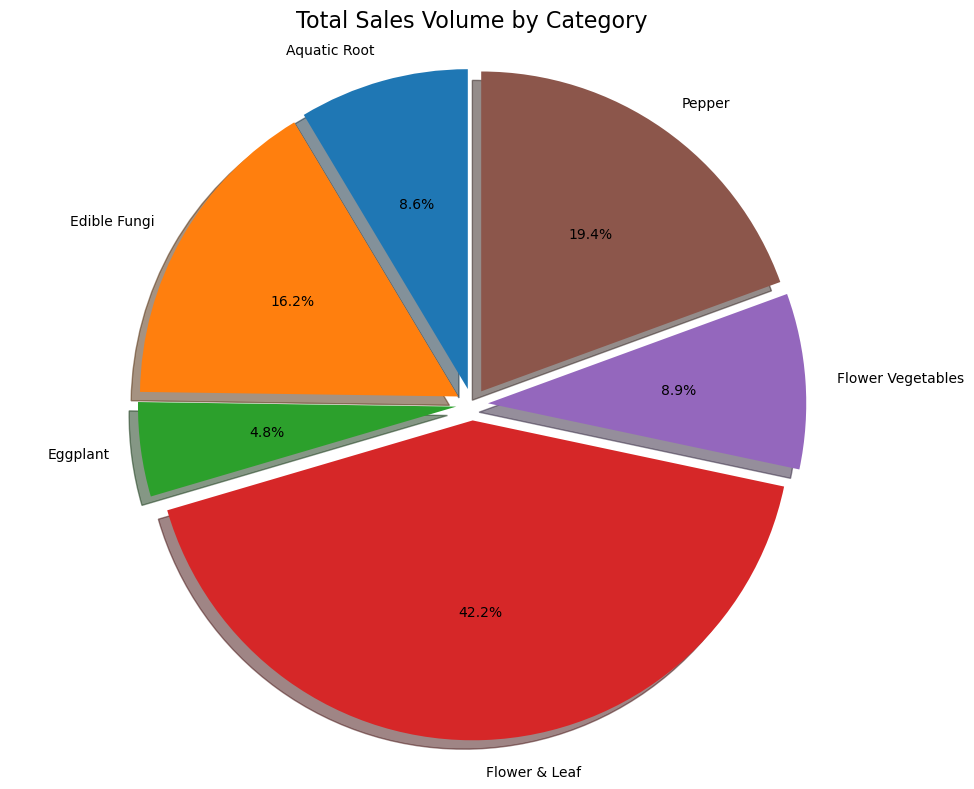

In [7]:
import matplotlib.pyplot as plt

# 按分类名称分组，计算每个分类的总销售量
category_sales = df2.groupby('Category_EN')['销量(千克)'].sum().reset_index()

# 打印各分类总销量
print("各分类总销量统计：")
print(category_sales)

# 创建饼状图
plt.figure(figsize=(10, 8))
plt.pie(
    category_sales['销量(千克)'], 
    labels=category_sales['Category_EN'],
    autopct='%1.1f%%',  # 显示百分比，保留一位小数
    startangle=90,      # 起始角度
    shadow=True,        # 添加阴影效果
    explode=[0.05] * len(category_sales)  # 略微分离每个扇区
)

# 添加标题
plt.title('Total Sales Volume by Category', fontsize=16)
plt.axis('equal')  # 保证饼图是圆形的

# 显示图形
plt.tight_layout()
plt.show()

# 如果需要，也可以保存图表
# plt.savefig('category_sales_pie.png', dpi=300, bbox_inches='tight')

各分类每日销量的统计描述：
            Category        Mean    Median     Variance  Skewness
0       Aquatic Root   37.402169   30.1940   983.273347  2.504498
1       Edible Fungi   70.126014   57.5350  2351.269269  2.992238
2           Eggplant   21.363602   18.8705   173.155074  1.735933
3      Flower & Leaf  182.968643  173.1920  7430.307220  2.897285
4  Flower Vegetables   38.529936   34.0725   514.163664  1.525605
5             Pepper   84.413483   72.9250  2855.409198  3.141826


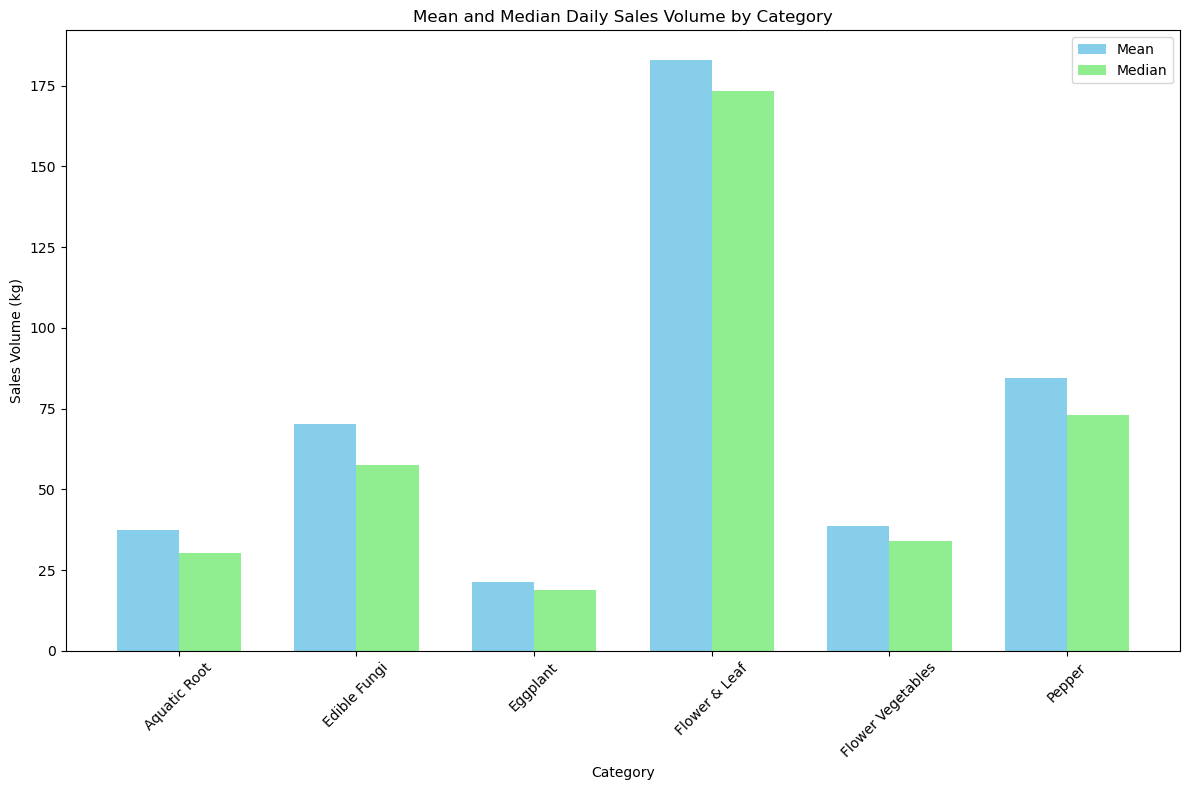

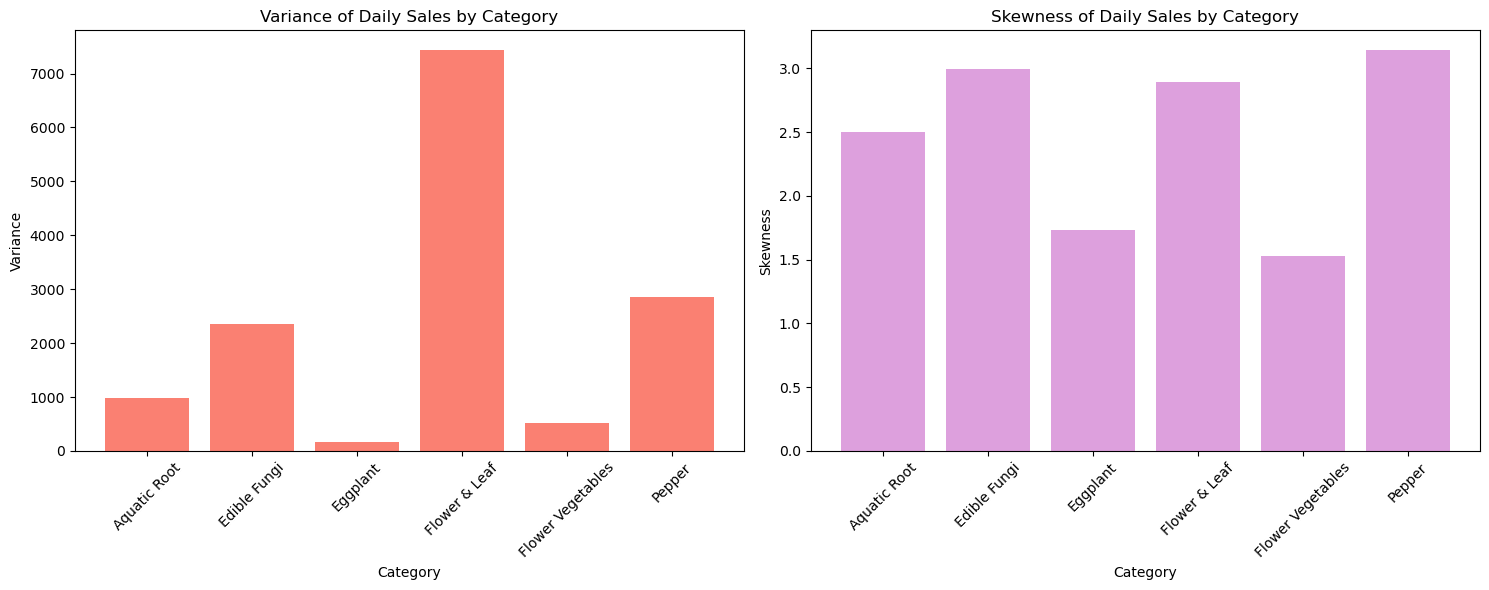

In [9]:
# 对每个分类名称的销量进行统计学描述
import numpy as np
from scipy import stats

# 按日期和分类名称分组，计算每天每个分类的总销售量
daily_sales = df2.groupby(['销售日期', 'Category_EN'])['销量(千克)'].sum().reset_index()

# 创建一个列表来存储每个分类的统计结果
stats_list = []

# 对每个分类进行统计分析
for category in daily_sales['Category_EN'].unique():
    if pd.notna(category):
        # 获取该分类的每日销量数据
        cat_sales = daily_sales[daily_sales['Category_EN'] == category]['销量(千克)']
        
        # 计算统计量
        mean_val = cat_sales.mean()
        median_val = cat_sales.median()
        var_val = cat_sales.var()
        skew_val = stats.skew(cat_sales)
        
        # 将结果添加到列表
        stats_list.append({
            'Category': category,
            'Mean': mean_val,
            'Median': median_val,
            'Variance': var_val,
            'Skewness': skew_val
        })

# 将列表转换为DataFrame
stats_df = pd.DataFrame(stats_list)

# 打印统计结果
print("各分类每日销量的统计描述：")
print(stats_df)

# 可视化展示
plt.figure(figsize=(12, 8))

# 绘制均值和中位数对比条形图
bar_width = 0.35
x = np.arange(len(stats_df))

plt.bar(x - bar_width/2, stats_df['Mean'], bar_width, label='Mean', color='skyblue')
plt.bar(x + bar_width/2, stats_df['Median'], bar_width, label='Median', color='lightgreen')

plt.xlabel('Category')
plt.ylabel('Sales Volume (kg)')
plt.title('Mean and Median Daily Sales Volume by Category')
plt.xticks(x, stats_df['Category'])
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 绘制方差和偏度的可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 方差条形图
ax1.bar(stats_df['Category'], stats_df['Variance'], color='salmon')
ax1.set_title('Variance of Daily Sales by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Variance')
ax1.tick_params(axis='x', rotation=45)

# 偏度条形图 - 修正颜色名称 'lightpurple' 为有效的颜色 'plum'
ax2.bar(stats_df['Category'], stats_df['Skewness'], color='plum')
ax2.set_title('Skewness of Daily Sales by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Skewness')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [28]:
# 单品统计学描述
import numpy as np
from scipy import stats

# 按日期和单品编码分组，计算每天每个单品的总销售量
daily_product_sales = df2.groupby(['销售日期', '单品编码'])['销量(千克)'].sum().reset_index()

# 创建一个列表来存储每个单品的统计结果
product_stats_list = []

# 对每个单品进行统计分析
for product_code in daily_product_sales['单品编码'].unique():
    if pd.notna(product_code):
        # 获取该单品的每日销量数据
        product_sales = daily_product_sales[daily_product_sales['单品编码'] == product_code]['销量(千克)']
        
        # 计算统计量
        mean_val = product_sales.mean()
        std_val = product_sales.std()  # 标准差
        skew_val = stats.skew(product_sales)
        
        # 从字典中获取单品名称
        product_name = vege_name_dict.get(product_code, "未知")
        
        # 将结果添加到列表
        product_stats_list.append({
            '单品编码': product_code,
            '单品名称': product_name,
            '平均值': mean_val,
            '标准差': std_val,
            '偏度': skew_val
        })

# 将列表转换为DataFrame
product_stats_df = pd.DataFrame(product_stats_list)

# 按平均销量降序排序
product_stats_df = product_stats_df.sort_values(by='平均值', ascending=False)

# 打印统计结果
print("各单品每日销量的统计描述：")
print(product_stats_df)

# 输出表格为 excel
product_stats_df.to_excel('单品销量统计.xlsx', index=False)


各单品每日销量的统计描述：
                单品编码     单品名称        平均值        标准差        偏度
19   102900005117056  泡泡椒(精品)  42.557566  20.038708  1.617338
7    102900005115960      大白菜  39.973371  38.897864  2.146348
154  106949711300259   金针菇(盒)  36.354312  33.095661  3.255581
138  102900011030059  云南生菜(份)  35.812500  23.775208  1.041951
62   102900011016701  芜湖青椒(1)  32.825561  23.126367  3.829387
..               ...      ...        ...        ...       ...
122  102900005128748      黄花菜   0.297333   0.230022  0.643686
105  102900011007471      薄荷叶   0.244129   0.170090  1.194850
174  102900011015384      马兰头   0.242143   0.151061  1.555103
121  102900011007495      蒲公英   0.235111   0.232022  1.901861
240  102900011032480       白蒿   0.158857   0.064496  0.367671

[246 rows x 5 columns]


/var/folders/cl/yslq0qr5729209j_yttkfpbr0000gn/T/ipykernel_95408/1879834680.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_val = stats.skew(product_sales)


各分类在不同季度的平均销售量：
季度                        Q1         Q2         Q3         Q4
Category_EN                                                  
Aquatic Root       12665.746   3478.437  11017.127  13420.043
Edible Fungi       23143.134  12649.486  14867.705  25426.400
Eggplant            5205.695   6873.999   7154.680   3197.408
Flower & Leaf      46313.841  40943.231  60602.504  50661.402
Flower Vegetables  10117.921   7732.667  12983.722  10932.141
Pepper             28789.024  19947.572  22777.167  20074.866
去季节化后（去除春夏秋冬影响）不同分类名称销量的相关系数矩阵：
                   Aquatic Root  Edible Fungi  Eggplant  Flower & Leaf  \
Aquatic Root           1.000000      0.630772  0.276730       0.545216   
Edible Fungi           0.630772      1.000000  0.370785       0.720160   
Eggplant               0.276730      0.370785  1.000000       0.392509   
Flower & Leaf          0.545216      0.720160  0.392509       1.000000   
Flower Vegetables      0.497453      0.550274  0.435270       0.586651   
Pepper      

/var/folders/cl/yslq0qr5729209j_yttkfpbr0000gn/T/ipykernel_25036/153457778.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = pivot_daily_sales[category].fillna(method='ffill').fillna(method='bfill')
/var/folders/cl/yslq0qr5729209j_yttkfpbr0000gn/T/ipykernel_25036/153457778.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = pivot_daily_sales[category].fillna(method='ffill').fillna(method='bfill')
/var/folders/cl/yslq0qr5729209j_yttkfpbr0000gn/T/ipykernel_25036/153457778.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = pivot_daily_sales[category].fillna(method='ffill').fillna(method='bfill')
/var/folders/cl/yslq0qr5729209j_yttkfpbr0000gn/T/ipykernel_25036/153457778.py:32: FutureWarning: Ser

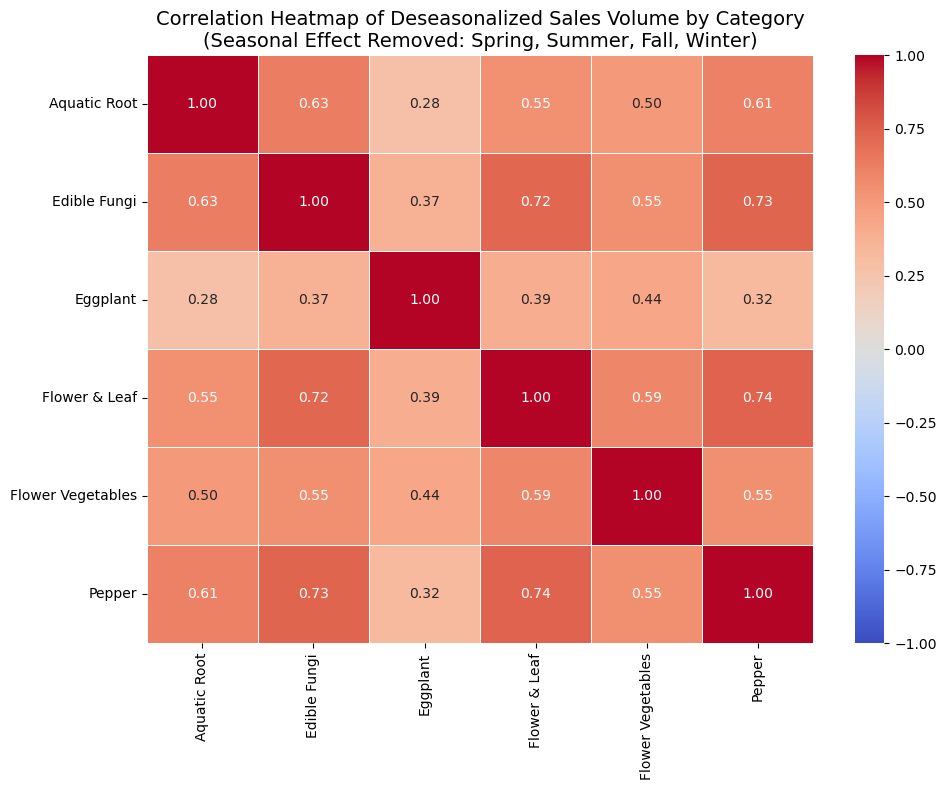

In [10]:
# 不同分类名称销量的相关性分析与热力图 - 去除季节影响（春夏秋冬）

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 按季度和分类名称进行分组，计算每个季度每个分类的总销售量
quarterly_sales = df2.groupby(['季度', 'Category_EN'])['销量(千克)'].sum().reset_index()

# 计算每个分类在各季度的平均销售量
category_avg_by_quarter = quarterly_sales.groupby(['Category_EN', '季度'])['销量(千克)'].mean().reset_index()

# 将这个数据透视为更容易使用的形式
category_quarter_pivot = category_avg_by_quarter.pivot(index='Category_EN', columns='季度', values='销量(千克)')

print("各分类在不同季度的平均销售量：")
print(category_quarter_pivot)

# 按日期和分类名称进行分组，计算每天每个分类的总销售量
daily_sales = df2.groupby(['销售日期', 'Category_EN'])['销量(千克)'].sum().reset_index()

# 将数据透视为宽格式，行为日期，列为分类名称
pivot_daily_sales = daily_sales.pivot(index='销售日期', columns='Category_EN', values='销量(千克)')

# 创建一个DataFrame来存储去季节化后的数据
deseasonalized_sales = pd.DataFrame(index=pivot_daily_sales.index)

# 对每个分类进行去季节化处理
for category in pivot_daily_sales.columns:
    # 确保没有缺失值，如果有，用前后值填充
    series = pivot_daily_sales[category].fillna(method='ffill').fillna(method='bfill')
    
    # 创建一个季节性因子列表
    seasonal_factors = []
    
    # 为每个日期添加对应的季节性因子
    for date in series.index:
        # 获取该日期的季度
        quarter = get_quarter(date)
        
        # 获取该分类在该季度的平均销售量
        if category in category_quarter_pivot.index and quarter in category_quarter_pivot.columns:
            seasonal_factor = category_quarter_pivot.loc[category, quarter]
        else:
            # 如果没有该季度的数据，使用整体平均值
            seasonal_factor = series.mean()
        
        seasonal_factors.append(seasonal_factor)
    
    # 计算该分类的总体平均销售量
    overall_mean = series.mean()
    
    # 计算季节性指数（季节平均值/总体平均值）
    seasonal_indices = [factor / overall_mean if overall_mean != 0 else 1.0 for factor in seasonal_factors]
    
    # 去季节化：原始值 / 季节性指数
    deseasonalized_values = [value / index if index != 0 else value for value, index in zip(series.values, seasonal_indices)]
    
    # 存储去季节化后的数据
    deseasonalized_sales[category] = deseasonalized_values

# 计算去季节化后的数据的相关系数矩阵
correlation_matrix = deseasonalized_sales.corr()

# 打印相关系数矩阵
print("去季节化后（去除春夏秋冬影响）不同分类名称销量的相关系数矩阵：")
print(correlation_matrix)

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,                 # 显示数值
    cmap='coolwarm',            # 颜色映射
    vmin=-1, vmax=1,            # 数值范围
    linewidths=0.5,             # 网格线宽度
    fmt='.2f'                   # 数值格式（保留两位小数）
)

# 添加标题和标签
plt.title('Correlation Heatmap of Deseasonalized Sales Volume by Category\n(Seasonal Effect Removed: Spring, Summer, Fall, Winter)', fontsize=14)
plt.tight_layout()

# 显示热力图
plt.show()

# 可选：保存热力图
# plt.savefig('quarterly_deseasonalized_category_correlation_heatmap.png', dpi=300, bbox_inches='tight')